# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Para a primeira parte, é necessário entender do que se trata o negócio, suas motivações e objetivos.
Nesta base de dados, irei analisar a concessão de crédito para clientes de um determinado banco, e o objetivo é construir um modelo preditivo para identificar e minimizar o risco de inadimplência através de variáveis e parâmetros que serão definidos ao decorrer do projeto.

O objetivo do projeto é focado na redução do risco de crédito dos clientes, servindo de parâmetro para que o próprio cliente defina e avalie suas decisões, e não o banco em si.
Na modelagem, o objetivo é desenvolver o melhor modelo preditivo.

Também se faz necessário avaliar o segmento em que a empresa está inserida, a situação da mesma e a quantidade da amostra (quanto maior a base, mais detalhado e preciso o modelo será).

## Etapa 2 Crisp-DM: Entendimento dos dados

Para criar o modelo, é necessário entender os dados para que o código seja mais direto possível.
Nesta base de dados, temos 15 colunas (variáveis), contando com a coluna "unnamed:0" com diferentes funções e definições. Cada linha representa um cliente diferente, com atribuições e características distintas (vide: renda, idade, filhos e quantidade de pessoas na residência). O restante das variáveis é Sim e Não. 


### Dicionário de dados



| Variável                | Descrição                                                                               | Tipo  
| ----------------------- |:---------------------------------------------------------------------------------------:| -----:|
| data_ref                |  Data                                                                                   | object  |
| id_cliente              |  Código do cliente                                                                      | int64  |
| sexo                    |  Masculino? Sim ou Não                                                                  | object |
| posse_de_veiculo        |  Sim ou Não                                                                             | bool |
| posse_de_imovel         |  Sim ou Não                                                                             | bool |
| qtd_filhos              |  Quantidade de filhos                                                                   | int64 |
| tipo_renda              |  Se divide em 4 subgrupos                                                               | object |
| educacao                |  Se divide em 4 subgrupos                                                               | object |
| estado_civil            |  Se divide em 4 subgrupos                                                               | object |
| tipo_residencia         |  Se divide em 5 subgrupos                                                               | object |
| idade                   |  Idade do cliente                                                                       | int64 |
| tempo_emprego           |  Quanto tempo o clientes está no atual emprego                                          | float64 |
| qt_pessoas_residencia   |  Quantas pessoas vivem na residência com o cliente                                      | float64 |
| renda                   |  Remuneração do cliente                                                                 | float64 |





In [16]:
print(renda.dtypes)

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object


#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

Para carregar os pacotes, é necessário uma biblioteca específica do pandas, para instalá-la, basta digitar o seguinte comando:

pip install pandas-profiling

Caso retorne algum erro, é por conta da versão mais recente dos pacotes, oque nos obriga a utilizar outra biblioteca:

pip install ydata_profiling

Uma dessas duas, com certeza irá funcionar.

Dito isso, vamos aos pacotes...

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

Os pacotes que serão utilizados precisam estar instalados, com suas versões corretas. Neste caso, irei utilizar o "ydata-profiling", porém ele nos obriga a utilizar uma versão do NumPy menor ou igual a "2.0.0".
Recomendo abrir o seu CMD, aonde o streamlit está rodando, desinstalar o Numpy com o comando "pip unistall numpy", abrir o Nupyter Notebook, ir em "Kernel -> Restart Kernel", voltar para o CMD, e digitar os seguintes comandos:
pip install numpy == 2.0.0
pip install ipywidgets

Após a instalação correta das bibliotecas, vamos começar nosso projeto.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline


In [3]:
renda = pd.read_csv('G:\\EBAC\\Provas\\Modulo 16\\projeto 2\\input\\previsao_de_renda.csv')

In [4]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [5]:
renda.drop(labels='Unnamed: 0', axis = 1, inplace=True)
renda

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Como o sietema operacional do meu terminal está instalado no disco "C:" e todos os arquivos de programas estão instalados no disco "G:", se faz necessário informar o caminho completo de onde estão as pastas, assim como fiz quando carreguei a base de dados no início do código.

In [7]:
prof.to_file('G:\\EBAC\\Provas\\Modulo 16\\projeto 2\\output\\renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




Na base de dados, temos 15 mil linhas, com 14 colunas no total. Os dados faltantes representam praticamente 1% da amostra, oque não irá interferir no treinamento. As variáveis categóricas serão transformadas em "dummies", analisadas e posteriormente treinadas para que a automatização seja mais eficiente.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [9]:
renda.drop(columns=['data_ref', 'id_cliente'], axis=1, inplace=True)
renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [10]:
renda.isna().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [11]:
renda = renda.dropna()
renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [12]:
num_duplicadas = renda.duplicated().sum()
print(num_duplicadas)

3772


In [13]:
renda = renda.drop_duplicates()

In [14]:
renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14988,M,False,True,0,Assalariado,Superior completo,Casado,Casa,58,4.164384,2.0,15702.40
14992,M,False,False,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [15]:
new_order = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tem_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade' , 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
renda = renda.reindex(columns=new_order)
renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tem_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,NaN,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,NaN,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,NaN,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,NaN,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,NaN,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,M,False,True,0,NaN,Assalariado,Superior completo,Casado,Casa,58,4.164384,2.0,15702.40
14992,M,False,False,1,NaN,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14
14997,F,True,True,0,NaN,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,NaN,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


* Ao invés de deixar os outliers na base, para "limpar" melhor os dados do dataframe, pode-se substituir os outliers pelo desvio padrão, por exemplo, e remover as linhas duplicadas, se houver, antes de começar  atreinar o modelo.

In [16]:
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'tipo_residencia', 'estado_civil'])
renda

,posse_de_veiculo,posse_de_imovel,qtd_filhos,tem_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,...,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
0,False,True,0,NaN,26,6.602740,1.0,8060.34,True,False,...,True,False,False,False,False,False,False,True,False,False
1,True,True,0,NaN,28,7.183562,2.0,1852.15,False,True,...,True,False,False,False,False,True,False,False,False,False
2,True,True,0,NaN,35,0.838356,2.0,2253.89,True,False,...,True,False,False,False,False,True,False,False,False,False
3,False,True,1,NaN,30,4.846575,3.0,6600.77,True,False,...,True,False,False,False,False,True,False,False,False,False
4,True,False,0,NaN,33,4.293151,1.0,6475.97,False,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,False,True,0,NaN,58,4.164384,2.0,15702.40,False,True,...,True,False,False,False,False,True,False,False,False,False
14992,False,False,1,NaN,33,1.041096,3.0,1918.14,False,True,...,True,False,False,False,False,True,False,False,False,False
14997,True,True,0,NaN,45,7.832877,2.0,604.82,True,False,...,True,False,False,False,False,True,False,False,False,False
14998,True,False,0,NaN,36,4.298630,2.0,3352.27,False,True,...,True,False,False,False,False,True,False,False,False,False


In [17]:
def replace_outliers_with_std(renda):
    for col in renda.select_dtypes(include='number').columns:
        renda[col] = renda[col].astype(float)  # Converte a coluna para float
        q1 = renda[col].quantile(0.25)
        q3 = renda[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identificar outliers
        outliers = (renda[col] < lower_bound) | (renda[col] > upper_bound)

        # Substituir outliers pelo desvio padrão da coluna
        renda.loc[outliers, col] = renda[col].std()

    return renda

# Aplicando a função ao DataFrame
renda = replace_outliers_with_std(renda)

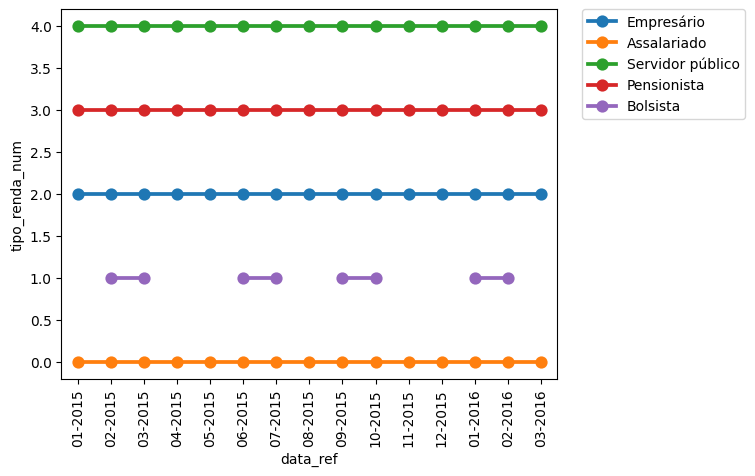

In [17]:
# Comvertendo a coluna 'data_ref'
renda['data_ref'] = pd.to_datetime(renda['data_ref'], format='%Y-%m-%d')  # ou ajuste o formato se necessário

renda['tipo_renda_num'] = renda['tipo_renda'].astype('category').cat.codes

# Plotar com 'tipo_renda_num' no eixo Y
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='tipo_renda_num',
    hue='tipo_renda'
)

# Gerar os rótulos formatados
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# Ajustar os ticks e rótulos no gráfico
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

# Exibir a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

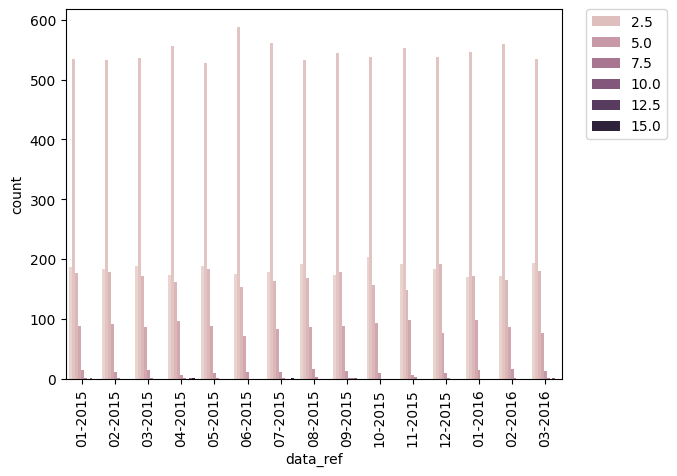

In [24]:
# Quantiudade de pessoas na residência
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='qt_pessoas_residencia'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

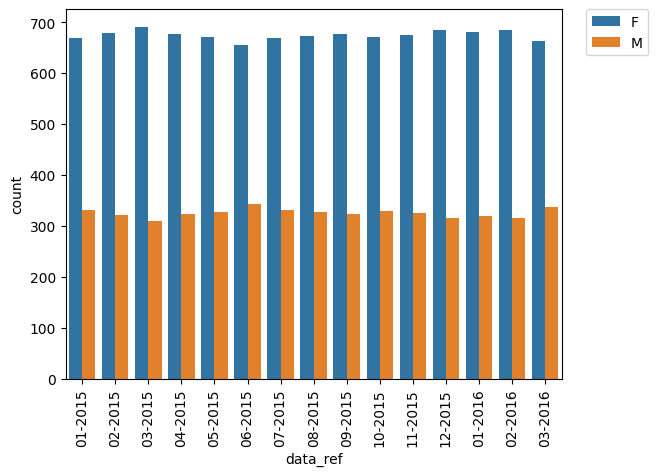

In [25]:
# Sexo que mais utiliza o serviço
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='sexo'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


# Será explicado na etapa 5.

### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [34]:
print(renda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_ref                       15000 non-null  datetime64[ns]
 1   id_cliente                     15000 non-null  int64         
 2   posse_de_veiculo               15000 non-null  bool          
 3   posse_de_imovel                15000 non-null  bool          
 4   qtd_filhos                     15000 non-null  int64         
 5   idade                          15000 non-null  int64         
 6   tempo_emprego                  12427 non-null  float64       
 7   qt_pessoas_residencia          15000 non-null  float64       
 8   renda                          15000 non-null  float64       
 9   tipo_renda_num                 15000 non-null  int8          
 10  sexo_M                         15000 non-null  bool          
 11  tipo_renda_Bols

In [36]:
renda = renda.drop(['data_ref', 'id_cliente', 'tempo_emprego'], axis=1)
renda.isnull().sum()

posse_de_veiculo                 0
posse_de_imovel                  0
qtd_filhos                       0
idade                            0
qt_pessoas_residencia            0
renda                            0
tipo_renda_num                   0
sexo_M                           0
tipo_renda_Bolsista              0
tipo_renda_Empresário            0
tipo_renda_Pensionista           0
tipo_renda_Servidor público      0
educacao_Pós graduação           0
educacao_Secundário              0
educacao_Superior completo       0
educacao_Superior incompleto     0
estado_civil_Separado            0
estado_civil_Solteiro            0
estado_civil_União               0
estado_civil_Viúvo               0
tipo_residencia_Casa             0
tipo_residencia_Com os pais      0
tipo_residencia_Comunitário      0
tipo_residencia_Estúdio          0
tipo_residencia_Governamental    0
dtype: int64

In [37]:
X = renda.drop(['renda'], axis=1).copy()
y= renda['renda']

In [40]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: renda
Non-Null Count  Dtype  
--------------  -----  
15000 non-null  float64
dtypes: float64(1)
memory usage: 117.3 KB


* Rodando o modelo

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2360873)

In [39]:
modelo_1 = RandomForestRegressor(max_depth=2)
modelo_2 = RandomForestRegressor(max_depth=8)

modelo_1.fit(X_train, y_train)
modelo_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=8)

* Vamos aos números...

In [42]:
mse1 = modelo_1.score(X_test, y_test)
mse2 = modelo_2.score(X_test, y_test)

print(f'O mse do modelo 1 é {mse1}')
print(f'O mse do modelo 2 é {mse2}')

O mse do modelo 1 é 0.10640679302524803
O mse do modelo 2 é 0.2447221735179277


In [43]:
modelo_2 = RandomForestRegressor (max_depth=8, min_samples_leaf=20)
modelo_2.fit(X_train, y_train) 
mse1 = modelo_2.score(X_test, y_test)
mse1

0.12651123789158214

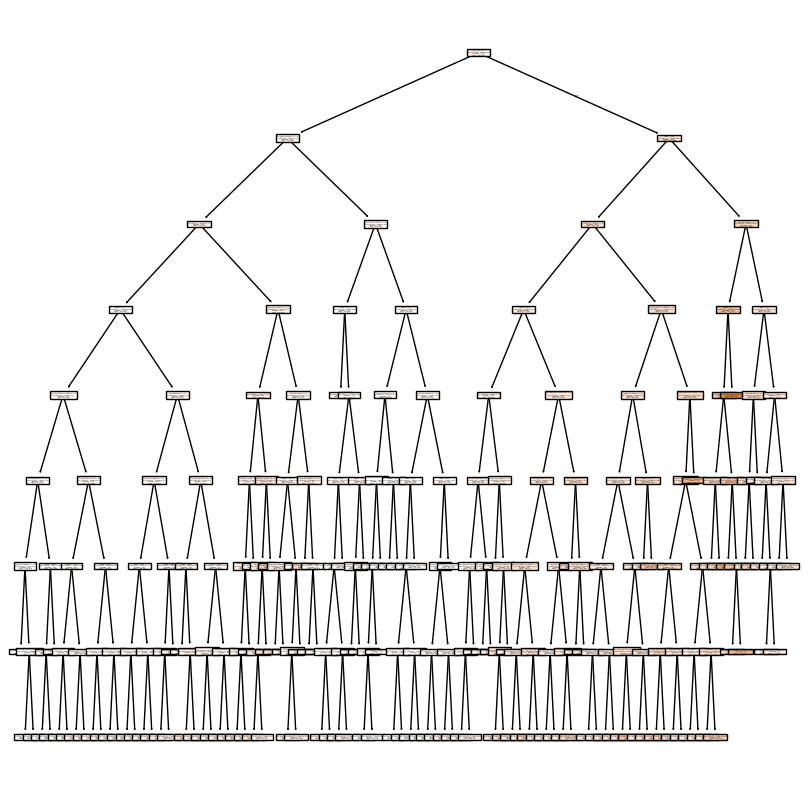

In [46]:
tree_estimator = modelo_2.estimators_[0]

# Plotar a árvore
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(tree_estimator,
                    feature_names=X_test.columns,
                    filled=True)
plt.show()

In [47]:
# Pré poda da melhor árvore

modelo_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
modelo_2.fit(X_train, y_train)
mse1 = modelo_2.score(X_test, y_test)
mse1

0.11706616705020734

In [50]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg2.fit(X_train, y_train)
        mse1 = modelo_2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

n_minimo,1,2,3,4,5,6,7,8
profundidade,,,,,,,,
1,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586
2,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586
3,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586
4,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586
5,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586
6,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586
7,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586
8,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586,0.156586


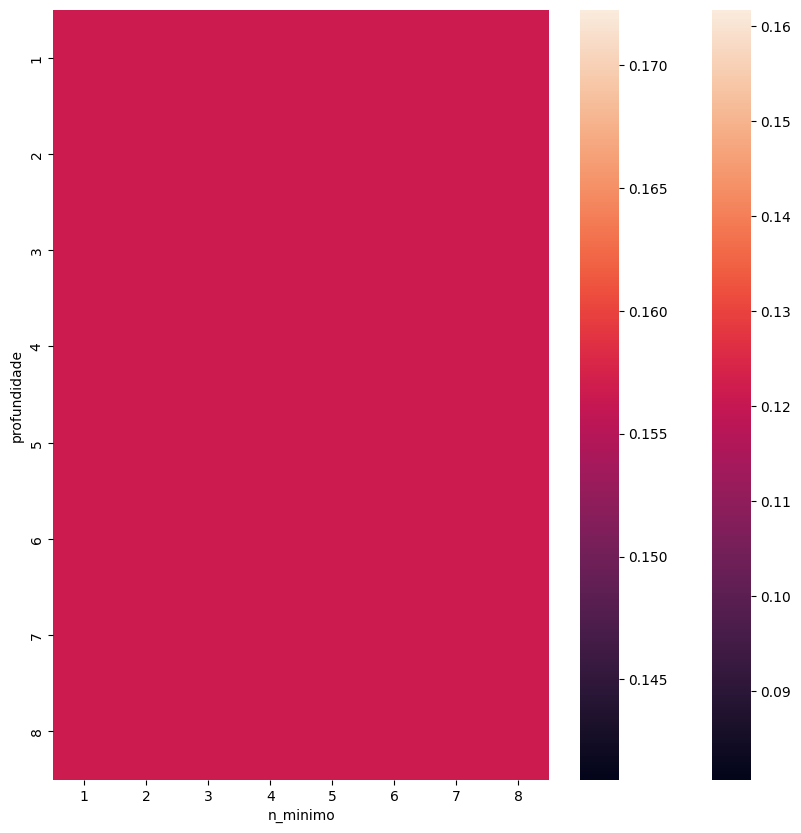

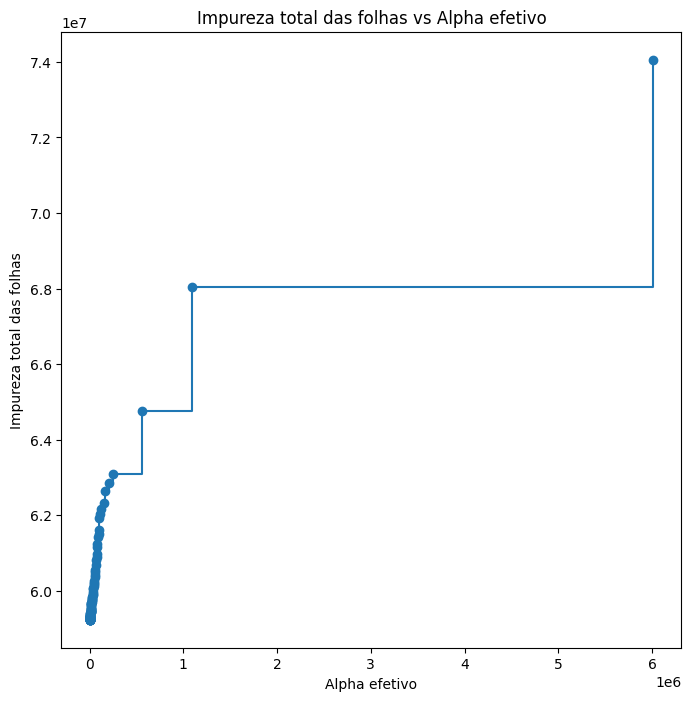

In [54]:
path = tree_estimator.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plotar o gráfico de alpha efetivo vs impureza
plt.figure(figsize=(8, 8))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")
plt.title("Impureza total das folhas vs Alpha efetivo")
plt.show()

In [55]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_test, y_test)
    clfs.append(clf)

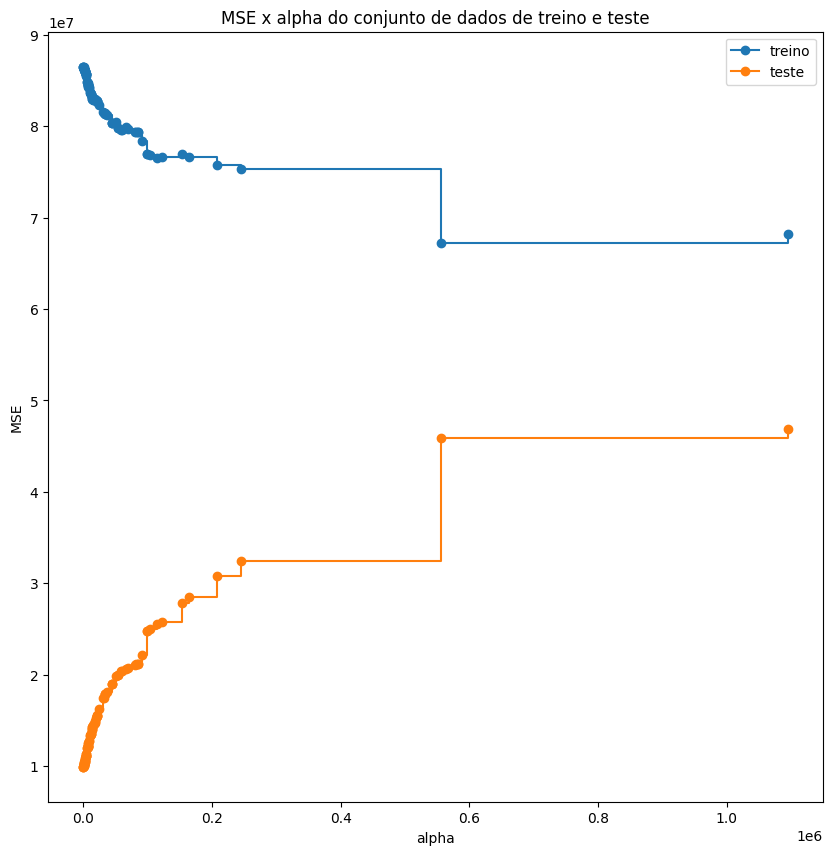

In [56]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [57]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
}

# Crie o modelo
rf = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, random_state=42)

# Realize o grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=7, min_samples_leaf=7,
                                             random_state=42),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 1000]})

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


In [58]:
# Melhor modelo
best_model = grid_search.best_estimator_

In [59]:
print(best_model)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, n_estimators=500,
                      random_state=42)


In [60]:
modelo_final = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, n_estimators=500, random_state=42)

modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

Conforme o avanço do modelo, foi subistitído os outliers para o desvio padrão da variável respsctiva, foi feita a transformação das variáveis categóricas em "dummies" e por fim, removido as linhas duplicadas. O dataframe final ficou com 8655 linhas (clientes).
Após essa "limpeza", foi feito o treinamento do modelo usando "random forest", ajustando alguns parâmetros para viabilizar a conclusão do treinamento.
*O melhor modelo alcançado nesse dataframe foi no valor do R² de 25%.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [61]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(44040829.8554114)

In [62]:
r2_train = modelo_final.score(X_train, y_train)
r2_test = modelo_final.score(X_test, y_test)

print(r2_train)
print(r2_test)

0.24704131943937868
0.138746589726363


* Para o modelo final, foi alcançado o R² de 25%.